# <center> EDA-1. Введение в разведывательный анализ данных. Алгоритмы и методы EDA

### Датасет Wine

country — страна-производитель вина.

description — подробное описание.

designation — название виноградника, где выращивают виноград для вина.

points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

price — стоимость бутылки вина.

province — провинция или штат.

region_1 — винодельческий район в провинции или штате (например Напа).

region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

taster_name — имя сомелье.

taster_twitter_handle — твиттер сомелье.

title — название вина, которое часто содержит год и другую подробную информацию.

variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).

winery — винодельня, которая производила вино.

In [49]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('data/wine.csv')

display(data.head())

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [51]:
#Задание 4.1
display(data['taster_name'].nunique()) #19
#Задание 4.2
display(data['price'].max()) #3300

19

3300.0

In [52]:
#Задание 5.2
display(data.info())

#Задание 5.3
print('Уникальны ли значения в датасете?', data['description'].nunique() == data.shape[0])

dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
data_duplicates = data[mask]
print('Число дубликатов:', data_duplicates.shape[0])

data_dedupped = data.drop_duplicates(subset=dupl_columns)
print('Итого записей без учета дубликатов:', data_dedupped.shape[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


None

Уникальны ли значения в датасете? False
Число дубликатов: 9983
Итого записей без учета дубликатов: 119988


In [57]:
#Задание 5.5

#Удаляем стобцы с пропусками в данных более 30%
data_copy1 = data_dedupped.copy()

thresh=data_copy1.shape[0]*0.7
data_copy1 = data_copy1.dropna(thresh=thresh, axis=1)

cols_null_percent = data_copy1.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols = cols_with_null.index

m=data_copy1.shape[1]
data_copy1 = data_copy1.dropna(thresh=m-2, axis=0)
display(data_copy1.isnull().mean().sort_values(ascending=False)*100)
print('Итого записей без учета дубликатов:', data_copy1.shape[0])

values = {
    'country': 'None provided',
    'description': 'None provided',
    'designation': 'None provided',
    'points': int(round(data_copy1['points'].median())),
    'price': data_copy1['price'].median(),
    'province': 'None provided',
    'region_1': 'None provided',
    'taster_name': 'None provided',
    'taster_twitter_handle': 'None provided',
    'title': 'None provided',
    'variety': 'None provided',
    'winery': 'None provided'
}

data_copy1_filled = data_copy1.fillna(values)
print('Количество пропусков столбцах:', data_copy1_filled.isnull().mean()*100,\
    'Оставшееся кол-во строк и столбцов:', data_copy1_filled.shape)


designation              23.580345
taster_twitter_handle    17.797930
region_1                 17.075014
taster_name              13.858312
price                     5.926270
country                   0.000000
description               0.000000
points                    0.000000
province                  0.000000
title                     0.000000
variety                   0.000000
winery                    0.000000
dtype: float64

Итого записей без учета дубликатов: 109833
Количество пропусков столбцах: country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64 Оставшееся кол-во строк и столбцов: (109833, 12)


count    103324.000000
mean         36.143481
std          43.148441
min           4.000000
25%          17.000000
50%          26.000000
75%          44.000000
max        3300.000000
Name: price, dtype: float64

count    109833.000000
mean         35.542351
std          41.918833
min           4.000000
25%          18.000000
50%          26.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

count    109833.000000
mean         88.568408
std           3.067708
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

count    109833.000000
mean         88.568408
std           3.067708
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

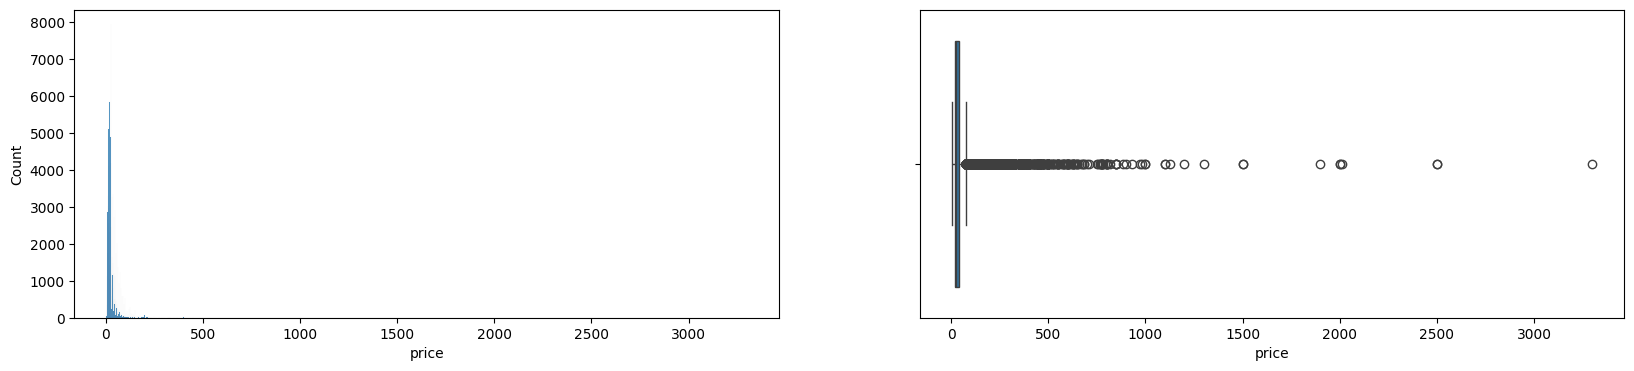

In [62]:
display(data_copy1['price'].describe())
display(data_copy1_filled['price'].describe())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
histplot = sns.histplot(data=data_copy1_filled, x='price', ax=axes[0]);
boxplot = sns.boxplot(data=data_copy1_filled, x='price', ax=axes[1]);
